In [2]:
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [3]:
scaling = pd.read_csv('sec_README.dat', delim_whitespace=True)

In [4]:
scaling['nodes'] = scaling['MPI']//4

In [5]:
scaling['ideal'] = scaling['nodes']/5

In [6]:
#scaling.set_index('nodes', inplace=True)

In [7]:
#scaling.drop([5,10], inplace=True)

In [8]:
scaling['speedup'] = scaling.WALL_TIME.max() / scaling.WALL_TIME

In [9]:
scaling['efficiency'] = scaling.speedup / scaling.ideal * 100

In [10]:
scaling['Sigma'] = scaling['Sgm_c'] + scaling['Sgm_x']

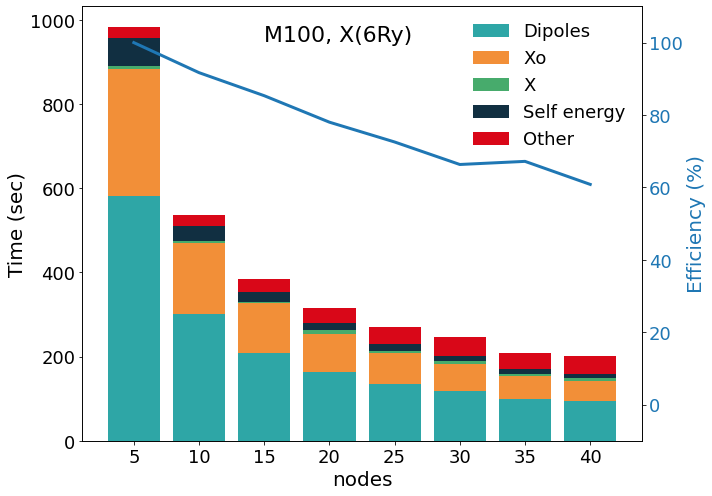

In [12]:
color1='#112F41'
color2='#2EA6A6'
color3='#47AB6C'
color4='#F28F38'
color5='#D90718'

residue=scaling['WALL_TIME']-scaling['dip']-scaling['Xo']-scaling['X']-scaling['Sgm_x']-scaling['Sgm_c']
sigma = scaling['Sgm_c']+scaling['Sgm_x']

fig, ax1 = plt.subplots(figsize=(10, 7))
ax1.set_xlabel('nodes',fontsize=20)
ax1.set_ylabel('Time (sec)',fontsize=20)
ax1.bar(scaling['nodes'],scaling['dip']  ,width=4,color=color2,label='Dipoles')
ax1.bar(scaling['nodes'],scaling['Xo']   ,width=4,color=color4,label='Xo', bottom=scaling['dip'])
ax1.bar(scaling['nodes'],scaling['X']    ,width=4,color=color3,label='X',bottom=scaling['dip']+scaling['Xo'] )
ax1.bar(scaling['nodes'],sigma           ,width=4,color=color1,label='Self energy',bottom=scaling['dip']+scaling['Xo']+scaling['X'])
ax1.bar(scaling['nodes'],residue         ,width=4,color=color5,label='Other',bottom=scaling['dip']+scaling['Xo']+scaling['X']+sigma)
#fig.xticks(scaling['nodes'])
ax1.legend( )
ax1.tick_params(axis = 'both', which = 'major', labelsize = 18)
ax1.legend(fontsize='18',framealpha=0.0)
ax1.text(15, 950, r'M100, X(6Ry)', fontsize=22)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylim([-10, 110])
ax2.set_ylabel('Efficiency (%)', color='tab:blue',fontsize=20)  # we already handled the x-label with ax1
ax2.plot(scaling['nodes'], scaling['efficiency'], linewidth=3, color='tab:blue')
ax2.tick_params(axis='y', labelcolor='tab:blue', labelsize=18)


fig.tight_layout()  # otherwise the right y-label is slightly clipped
#plt.title('Scaling - ecut=10Ry', fontsize=20)
plt.savefig('scaling.pdf')
plt.show()

In [8]:
scaling['node_h'] = scaling['nodes'] * scaling['WALL_TIME'] / 3600

In [9]:
scaling

ncores  MPI  threads       dip        Xo  Xo_REDUX       X  X_REDUX  \
0     160   20        8  582.2943  300.2192   87.7784  7.0464   6.9481   
1     320   40        8  300.2903  168.6891   57.1255  6.8655   6.7856   
2     480   60        8  208.4066  118.0636   40.9547  2.7894   2.7238   
3     640   80        8  162.7750   91.1397   31.2224  8.3256   8.1543   
4     800  100        8  135.9424   71.7884   24.6295  6.5516   6.4864   
5     960  120        8  117.8433   64.6314   24.0279  6.0935   6.0904   
6    1120  140        8  100.1698   54.6259   19.2305  3.8808   3.7894   
7    1280  160        8   93.9510   47.5844   15.8302  7.1586   7.0595   

     io_X    io_WF  ...  (REDUX)    Sgm_c  (REDUX).1  WALL_TIME  nodes  ideal  \
0  0.9700  10.7221  ...   0.3479  53.4668     2.8178        983      5    1.0   
1  0.7411   7.3285  ...   0.5433  26.5063     0.5691        536     10    2.0   
2  1.3285   5.6649  ...   0.7241  17.5345     0.5226        384     15    3.0   
3  0.8839   4.9759  ...   0.7377  13.8092     0.6543        315     20    4.0   
4  0.8513   4.5199  ...   0.5127  11.0193     0.2052        271     25    5.0   
5  0.7901   4.2144  ...   0.6798   9.1913     0.3301        247     30    6.0   
6  0.7392   3.0165  ...   0.9788   8.1494     0.2502        209     35    7.0   
7  2.9200   3.6317  ...   0.8745   7.3524     0.5589        202     40    8.0   

    speedup  efficiency    Sigma    node_h  
0  1.000000  100.000000  68.2428  1.365278  
1  1.833955   91.697761  34.6541  1.488889  
2  2.559896   85.329861  23.3646  1.600000  
3  3.120635   78.015873  18.5777  1.750000  
4  3.627306   72.546125  14.8844  1.881944  
5  3.979757   66.329285  12.8327  2.058333  
6  4.703349   67.190704  11.5566  2.031944  
7  4.866337   60.829208  10.4086  2.244444  

[8 rows x 21 columns]

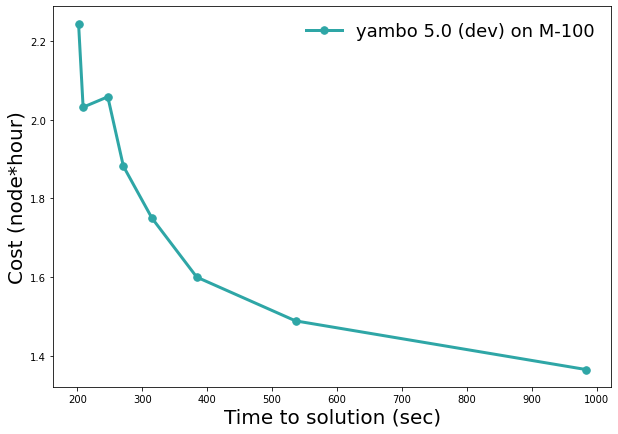

In [12]:
fig2, ax3 = plt.subplots(figsize=(10, 7))
ax3.set_xlabel('Time to solution (sec)',fontsize=20)
ax3.set_ylabel('Cost (node*hour)',fontsize=20)
ax3.plot(scaling['WALL_TIME'], scaling['node_h'], 
         linewidth=3, color=color2, marker='.', markersize=15,
         label='yambo 5.0 (dev) on M-100')
#ax3.set_ylim([0, 2.25])
ax3.legend()
ax3.legend(fontsize='18',framealpha=0.0)

plt.savefig('cost.pdf')
plt.show()

In [13]:
scaling.WALL_TIME

0    983
1    536
2    384
3    315
4    271
5    247
6    209
7    202
Name: WALL_TIME, dtype: int64

In [14]:
scaling.node_h

0    1.365278
1    1.488889
2    1.600000
3    1.750000
4    1.881944
5    2.058333
6    2.031944
7    2.244444
Name: node_h, dtype: float64

In [17]:
scaling[['nodes', 'WALL_TIME', 'node_h']].to_csv('cost_y5.0_m100_6ry.csv')

In [15]:
scaling[['nodes', 'dip', 'Xo', 'X', 'Sigma', 'WALL_TIME']][scaling.nodes%20==0]

nodes      dip       Xo       X    Sigma  WALL_TIME
3     20  162.775  91.1397  8.3256  18.5777        315
7     40   93.951  47.5844  7.1586  10.4086        202

In [16]:
residue=scaling['WALL_TIME']-scaling['dip']-scaling['Xo']-scaling['X']-scaling['Sgm_x']-scaling['Sgm_c']
residue

0    25.1973
1    25.5010
2    31.3758
3    34.1820
4    41.8332
5    45.5991
6    38.7669
7    42.8974
dtype: float64